### Formulas
$p_x$, $p_y$, and $p_z$ are the components of the momentum and the only given variables. $p$ represents the total momentum.

$$p = \sqrt(x^2 + y^2 + z^2)$$

$\theta$ represents the xz angle.

$$\theta = \arccos(p_z / p)$$

$\eta$ represents the pseudo-rapidity.

$$\eta = -\ln[\tan(\frac{\theta}{2})]$$

$\phi$ represents the xy angle. 

$$\phi = sgn(p_y)\arccos(\frac{p_x}{\sqrt{p_x^2 + p_y^2}})$$

$p_T$ represents the transverse momentum. 

$$p_T = p\sin(\phi)$$

In [23]:
import uproot as ur
import awkward as ak
import matplotlib.pyplot as plt
from math import *

def sgn(x):
    # returns the sign of x
    return x / abs(x)

theta, ptotal ,pT, eta = [], [], [], []

# get data from file
file_path = 'C:/Users/eholt/OneDrive/Documents/school/mentorship/EIC_JLAB_analysis/data/pythia8NCDIS_18x275_minQ2=10_beamEffects_xAngle=-0.025_hiDiv_1.0000.eicrecon.tree.edm4eic.root'
events = ur.open(file_path + ':events')
reconstructed_charged_particles = events['ReconstructedChargedParticles'].arrays()

# loop through events to find electrons and store their momentum
for i, event in  enumerate(reconstructed_charged_particles['ReconstructedChargedParticles.PDG']):
    for j, particle in  enumerate(event):
        if particle == 11:
            # find momentum components
            px = reconstructed_charged_particles['ReconstructedChargedParticles.momentum.x'][i][j]
            py = reconstructed_charged_particles['ReconstructedChargedParticles.momentum.y'][i][j]
            pz = reconstructed_charged_particles['ReconstructedChargedParticles.momentum.z'][i][j]
        
            # find total momentum, theta and pseudo-rapidity ( eta)
            ptotal.append(sqrt(px**2 + py**2 + pz**2))
            theta.append(acos(pz / ptotal[-1]))
            eta.append(-log(tan(theta[-1] / 2)))
            
            # find transverse momentum
            phi = sgn(py) * acos(px / sqrt(px**2 + py**2))
            pT.append(ptotal[-1] * sin(phi))
            
            
eptotal = ptotal.copy()
epT = pT.copy()
eeta = eta.copy()


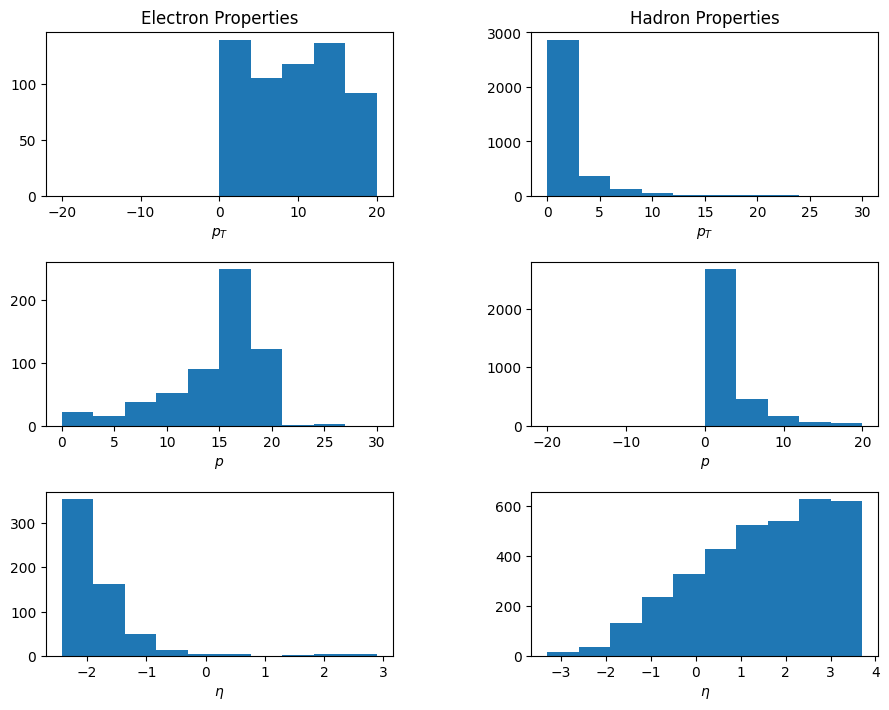

In [28]:
import uproot as ur
import awkward as ak
import matplotlib.pyplot as plt
from math import *

def sgn(x):
    # returns the sign of x
    return x / abs(x)

theta, ptotal ,pT, eta = [], [], [], []

# get data from file
file_path = 'C:/Users/eholt/OneDrive/Documents/school/mentorship/EIC_JLAB_analysis/data/pythia8NCDIS_18x275_minQ2=10_beamEffects_xAngle=-0.025_hiDiv_1.0000.eicrecon.tree.edm4eic.root'
events = ur.open(file_path + ':events')
reconstructed_charged_particles = events['ReconstructedChargedParticles'].arrays()

# loop through events to find pion and kaon and store their momentum
for i, event in  enumerate(reconstructed_charged_particles['ReconstructedChargedParticles.PDG']):
    for j, particle in  enumerate(event):
    
        if abs(particle) == 211 or abs(particle) == 321 or particle == 2212:
            # find momentum components
            px = reconstructed_charged_particles['ReconstructedChargedParticles.momentum.x'][i][j]
            py = reconstructed_charged_particles['ReconstructedChargedParticles.momentum.y'][i][j]
            pz = reconstructed_charged_particles['ReconstructedChargedParticles.momentum.z'][i][j]
        
            # find total momentum, theta and pseudo-rapidity ( eta)
            ptotal.append(sqrt(px**2 + py**2 + pz**2))
            theta.append(acos(pz / ptotal[-1]))
            eta.append(-log(tan(theta[-1] / 2)))
            
            # find transverse momentum
            phi = sgn(py) * acos(px / sqrt(px**2 + py**2))
            pT.append(ptotal[-1] * sin(phi))
            
# graph results with 1D histograms

pT = list(map(abs, pT))
epT = list(map(abs, epT))

fig1, hist1d = plt.subplots(nrows=3, ncols=2)

hist1d[0, 1].hist(pT, range = [0,30])
hist1d[0, 1].set_xlabel("$p_T$")
hist1d[0, 1].set_title("Hadron Properties")

hist1d[1, 1].hist(ptotal, range = [-20,20])
hist1d[1, 1].set_xlabel("$p$")

hist1d[2, 1].hist(eta)
hist1d[2, 1].set_xlabel("$\eta$")





hist1d[0, 0].hist(epT, range = [-20,20])
hist1d[0, 0].set_xlabel("$p_T$")
hist1d[0, 0].set_title("Electron Properties")

hist1d[1, 0].hist(eptotal, range = [0,30])
hist1d[1, 0].set_xlabel("$p$")

hist1d[2, 0].hist(eeta)
hist1d[2, 0].set_xlabel("$\eta$")


plt.subplots_adjust(left=0, bottom=0.1, right=1.3, top=1.4, wspace=0.4, hspace=0.4)
            
